In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API Key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "cities.csv"

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [5]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [6]:
# Print the city count to confirm sufficient count
len(cities)

624

In [7]:
# prep our url and params for our weather call
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"

# set up lists to hold reponse info
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
name = []
city_count = 1
# Loop through the list of cities and perform a request for data on each
for city in cities:
    query_url = url + 'appid=' + weather_api_key + "&q=" + city + "&units=" + units
    response = requests.get(query_url).json()
    
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])

        print(f"Successfully retrieved all data for city #{city_count} | {city}")
    
    except:
        print(f"Data for city #{city_count} not found")
    city_count += 1
    print("--------------------------------------------------------------")
print("All done grabbing data")

Successfully retrieved all data for city #1 | oparino
--------------------------------------------------------------
Successfully retrieved all data for city #2 | bluff
--------------------------------------------------------------
Successfully retrieved all data for city #3 | cherskiy
--------------------------------------------------------------
Successfully retrieved all data for city #4 | boyolangu
--------------------------------------------------------------
Successfully retrieved all data for city #5 | albany
--------------------------------------------------------------
Successfully retrieved all data for city #6 | cabo san lucas
--------------------------------------------------------------
Successfully retrieved all data for city #7 | bredasdorp
--------------------------------------------------------------
Successfully retrieved all data for city #8 | olafsvik
--------------------------------------------------------------
Successfully retrieved all data for city #9 | hasaki


Successfully retrieved all data for city #71 | lucapa
--------------------------------------------------------------
Successfully retrieved all data for city #72 | sobolevo
--------------------------------------------------------------
Successfully retrieved all data for city #73 | dakar
--------------------------------------------------------------
Successfully retrieved all data for city #74 | chuy
--------------------------------------------------------------
Successfully retrieved all data for city #75 | eidsvoll
--------------------------------------------------------------
Successfully retrieved all data for city #76 | bethel
--------------------------------------------------------------
Data for city #77 not found
--------------------------------------------------------------
Data for city #78 not found
--------------------------------------------------------------
Successfully retrieved all data for city #79 | pevek
--------------------------------------------------------------

Successfully retrieved all data for city #141 | yerbogachen
--------------------------------------------------------------
Successfully retrieved all data for city #142 | sayyan
--------------------------------------------------------------
Successfully retrieved all data for city #143 | lubao
--------------------------------------------------------------
Successfully retrieved all data for city #144 | haines junction
--------------------------------------------------------------
Successfully retrieved all data for city #145 | saldanha
--------------------------------------------------------------
Successfully retrieved all data for city #146 | atamanskaya
--------------------------------------------------------------
Successfully retrieved all data for city #147 | atar
--------------------------------------------------------------
Successfully retrieved all data for city #148 | clarence town
--------------------------------------------------------------
Successfully retrieved all data

Successfully retrieved all data for city #211 | orje
--------------------------------------------------------------
Successfully retrieved all data for city #212 | vostok
--------------------------------------------------------------
Data for city #213 not found
--------------------------------------------------------------
Successfully retrieved all data for city #214 | bam
--------------------------------------------------------------
Successfully retrieved all data for city #215 | uyuni
--------------------------------------------------------------
Successfully retrieved all data for city #216 | kaitangata
--------------------------------------------------------------
Successfully retrieved all data for city #217 | mirnyy
--------------------------------------------------------------
Successfully retrieved all data for city #218 | hilo
--------------------------------------------------------------
Successfully retrieved all data for city #219 | san-pedro
----------------------------

Successfully retrieved all data for city #282 | ribeira grande
--------------------------------------------------------------
Successfully retrieved all data for city #283 | iracoubo
--------------------------------------------------------------
Successfully retrieved all data for city #284 | griffith
--------------------------------------------------------------
Successfully retrieved all data for city #285 | souillac
--------------------------------------------------------------
Successfully retrieved all data for city #286 | nouadhibou
--------------------------------------------------------------
Successfully retrieved all data for city #287 | kununurra
--------------------------------------------------------------
Successfully retrieved all data for city #288 | aden
--------------------------------------------------------------
Data for city #289 not found
--------------------------------------------------------------
Successfully retrieved all data for city #290 | sakakah
-------

Successfully retrieved all data for city #353 | burnie
--------------------------------------------------------------
Successfully retrieved all data for city #354 | sur
--------------------------------------------------------------
Successfully retrieved all data for city #355 | guangyuan
--------------------------------------------------------------
Successfully retrieved all data for city #356 | baruun-urt
--------------------------------------------------------------
Successfully retrieved all data for city #357 | san vicente
--------------------------------------------------------------
Successfully retrieved all data for city #358 | blackwater
--------------------------------------------------------------
Successfully retrieved all data for city #359 | qeshm
--------------------------------------------------------------
Successfully retrieved all data for city #360 | dingle
--------------------------------------------------------------
Successfully retrieved all data for city #36

Successfully retrieved all data for city #424 | tabou
--------------------------------------------------------------
Successfully retrieved all data for city #425 | shirokiy
--------------------------------------------------------------
Successfully retrieved all data for city #426 | borovoy
--------------------------------------------------------------
Successfully retrieved all data for city #427 | lorengau
--------------------------------------------------------------
Successfully retrieved all data for city #428 | clyde river
--------------------------------------------------------------
Data for city #429 not found
--------------------------------------------------------------
Successfully retrieved all data for city #430 | marfino
--------------------------------------------------------------
Successfully retrieved all data for city #431 | urengoy
--------------------------------------------------------------
Successfully retrieved all data for city #432 | ambulu
----------------

Successfully retrieved all data for city #494 | ahipara
--------------------------------------------------------------
Successfully retrieved all data for city #495 | malatya
--------------------------------------------------------------
Data for city #496 not found
--------------------------------------------------------------
Successfully retrieved all data for city #497 | kendallville
--------------------------------------------------------------
Successfully retrieved all data for city #498 | buraydah
--------------------------------------------------------------
Successfully retrieved all data for city #499 | ostrovnoy
--------------------------------------------------------------
Successfully retrieved all data for city #500 | port blair
--------------------------------------------------------------
Successfully retrieved all data for city #501 | skjervoy
--------------------------------------------------------------
Successfully retrieved all data for city #502 | tambura
-------

Successfully retrieved all data for city #564 | port pirie
--------------------------------------------------------------
Successfully retrieved all data for city #565 | homer
--------------------------------------------------------------
Data for city #566 not found
--------------------------------------------------------------
Successfully retrieved all data for city #567 | vao
--------------------------------------------------------------
Successfully retrieved all data for city #568 | imeni zhelyabova
--------------------------------------------------------------
Successfully retrieved all data for city #569 | zhezkazgan
--------------------------------------------------------------
Successfully retrieved all data for city #570 | taoyuan
--------------------------------------------------------------
Data for city #571 not found
--------------------------------------------------------------
Successfully retrieved all data for city #572 | viedma
--------------------------------------

In [8]:
# Create DF
weather_dict = {"City": name,
               "Latitude": lat,
               "Longitude": long,
               "Max_Temp": max_temp,
               "Humidity": humidity,
               "Cloudiness": cloudiness, 
               "Wind_Speed": wind,
               "Country": country}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country
0,Oparino,59.8518,48.2783,1.87,97,100,3.78,RU
1,Bluff,-46.6000,168.3333,7.78,80,56,2.68,NZ
2,Cherskiy,68.7500,161.3000,-5.89,83,60,3.75,RU
3,Boyolangu,-8.1181,111.8935,23.69,92,45,0.82,ID
4,Albany,42.6001,-73.9662,10.56,31,4,4.92,US


<h3>Exporting df to csv </h3>

In [9]:
weather_df.to_csv(output_data_file, index = False)

<h3>Data Analysis and Graphs</h3>

In [10]:
tmp_df = weather_df.loc[weather_df["Humidity"]>100, :]
tmp_df

,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country


In [11]:
# No cities over 100% humidity, moving on

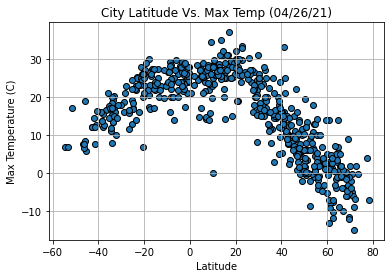

In [12]:
# Scatter for latitude Vs Max Temp
plt.scatter(weather_df['Latitude'], weather_df['Max_Temp'], edgecolor='black')
plt.title("City Latitude Vs. Max Temp (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

In [13]:
# This gives us all the max temperature readings (in celsius) of the cities in our data set by latitude coordinates

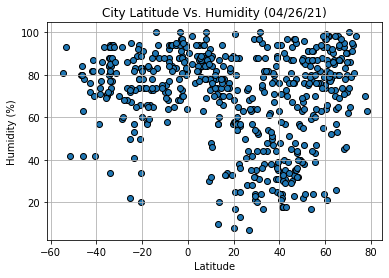

In [14]:
# Scatter for latitude Vs Humidity
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], edgecolor='black')
plt.title("City Latitude Vs. Humidity (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

In [15]:
# This graph shows us the percent of humidity in our city data set by latitude location

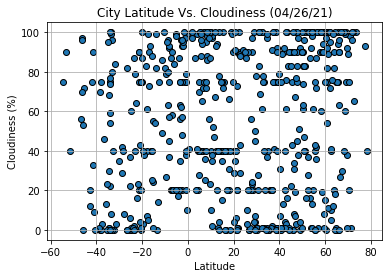

In [16]:
# Scatter for latitude Vs Cloudiness
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], edgecolor='black')
plt.title("City Latitude Vs. Cloudiness (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

In [17]:
# This data shows us the percent of cloudiness in our data set for cities by latitude

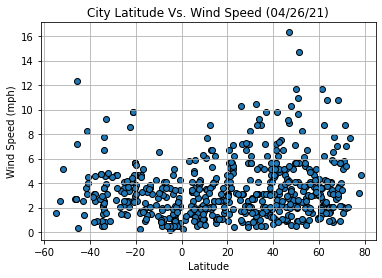

In [18]:
# Scatter for latitude Vs Cloudiness
plt.scatter(weather_df['Latitude'], weather_df['Wind_Speed'], edgecolor='black')
plt.title("City Latitude Vs. Wind Speed (04/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

In [21]:
# This graph shows us the wind speed (mph) in our city data set by latitude location

<h1>Linear Regression</h1>
<h3>Max Temperature of Cities</h3>

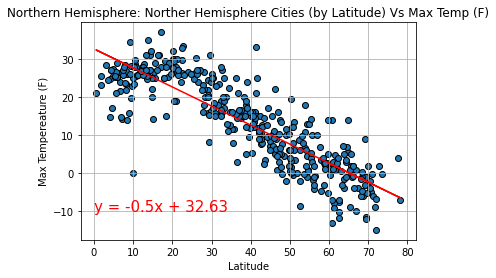

The r-value is: 0.744


In [40]:
# Cities in the Northern Hemisphere
temp_north_hemi_df = weather_df.loc[weather_df["Latitude"]>= 0, :]
x_values = temp_north_hemi_df["Latitude"]
y_values = temp_north_hemi_df["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Northern Hemisphere: Norther Hemisphere Cities (by Latitude) Vs Max Temp (F)")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Tempereature (F)')
plt.grid()
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")

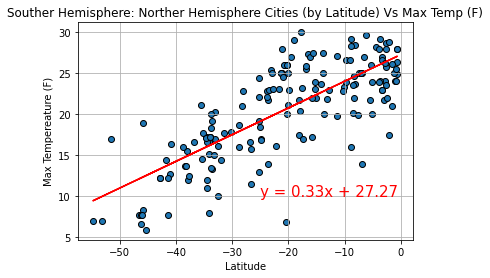

The r-value is: 0.582


In [39]:
# Cities in the Northern Hemisphere
temp_south_hemi_df = weather_df.loc[weather_df["Latitude"] < 0, :]
x_values = temp_south_hemi_df["Latitude"]
y_values = temp_south_hemi_df["Max_Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Souther Hemisphere: Norther Hemisphere Cities (by Latitude) Vs Max Temp (F)")
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Tempereature (F)')
plt.grid()
plt.show()
print(f"The r-value is: {round(rvalue**2, 3)}")